In [74]:
import tensorflow as tf
import keras
import keras.utils
from keras import utils as np_utils

from tensorflow.keras import layers
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



# Train-Test split

In [75]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Pre-Processing

In [76]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Encoder and Decoder 

In [77]:
input_img = tf.keras.Input(shape=(784,))

def encoder(input_img):
  encoded = layers.Dense(500, activation='relu')(input_img)
  encoded = layers.Dense(200, activation='relu')(encoded)
  encoded = layers.Dense(5, activation='relu')(encoded)
  return encoded
 
def decoder(encoded):
  decoded = layers.Dense(200, activation='relu')(encoded)
  decoded = layers.Dense(500, activation='relu')(decoded)
  decoded = layers.Dense(784, activation='sigmoid')(decoded)
  return decoded

In [78]:
autoencoder = tf.keras.Model(input_img, decoder(encoder(input_img)))

In [79]:
adam = keras.optimizers.Adam(learning_rate=0.001)

In [80]:
autoencoder.compile(optimizer='adam', loss='mse')

In [81]:
autoencoder_train = autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0481 - val_loss: 0.0313
Epoch 2/25
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0283 - val_loss: 0.0262
Epoch 3/25
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0256 - val_loss: 0.0249
Epoch 4/25
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0247 - val_loss: 0.0244
Epoch 5/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0240 - val_loss: 0.0239
Epoch 6/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0236 - val_loss: 0.0236
Epoch 7/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0233 - val_loss: 0.0232
Epoch 8/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0230 - val_loss: 0.0230
Epoch 9/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0227 - val_

In [82]:
encoded_imgs = autoencoder.predict(x_test)

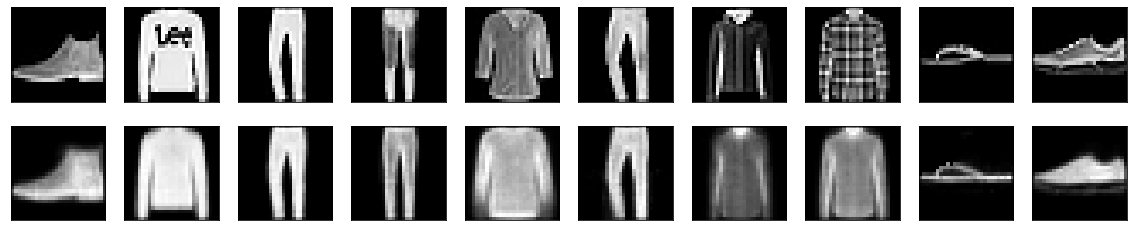

In [83]:
# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

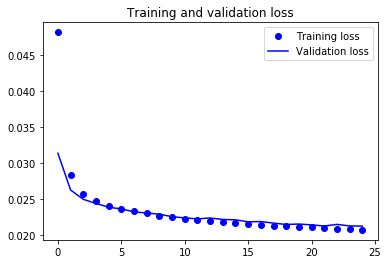

In [84]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(25) 
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [85]:
import keras
import keras.utils
from keras import utils as np_utils

In [86]:
# This is a mlp classification code with features reduced by an Autoencoder

from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np


# One-hot encoding

In [87]:
train_y_one_hot = tf.keras.utils.to_categorical(y_train)
test_y_one_hot = tf.keras.utils.to_categorical(y_test)
# print('Original label:', y_train[0])
# print('After conversion to one-hot:', train_y_one_hot[0])

In [88]:
train_X, valid_X, train_label, valid_label = train_test_split(x_train, train_y_one_hot, test_size=0.2, random_state =42)

In [89]:
def classifier(encoder):
  flat = tf.keras.layers.Flatten()(encoder)
  dense = tf.keras.layers.Dense(128, activation='relu')(flat)
  output = tf.keras.layers.Dense(10, activation='softmax')(dense)
  return output

In [90]:
model = tf.keras.Model(input_img, classifier(encoder(input_img)))
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_23 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_24 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 1005      
_________________________________________________________________
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290

In [91]:
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [92]:
classify_train = model.fit(train_X, train_label, batch_size = 256, epochs=25, verbose=1, validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 2s 45us/sample - loss: 0.7219 - accuracy: 0.7446 - val_loss: 0.4913 - val_accuracy: 0.8177
Epoch 2/25
48000/48000 [==============================] - 2s 34us/sample - loss: 0.4298 - accuracy: 0.8453 - val_loss: 0.3904 - val_accuracy: 0.8580
Epoch 3/25
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3724 - accuracy: 0.8673 - val_loss: 0.3625 - val_accuracy: 0.8700
Epoch 4/25
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3461 - accuracy: 0.8756 - val_loss: 0.3423 - val_accuracy: 0.8763
Epoch 5/25
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3209 - accuracy: 0.8829 - val_loss: 0.3501 - val_accuracy: 0.8747
Epoch 6/25
48000/48000 [==============================] - 2s 34us/sample - loss: 0.2995 - accuracy: 0.8898 - val_loss: 0.3290 - val_accuracy: 0.8808
Epoch 7/25
48000/48000 [==============================] 

In [93]:
test_eval = model.evaluate(x_test, test_y_one_hot, verbose=0)

In [94]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.41349313932657245
Test accuracy: 0.8807


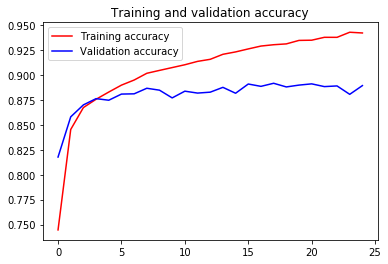

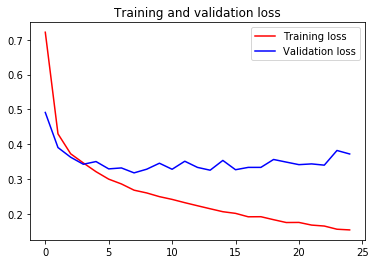

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [97]:
print('Train accuracy of the model: ',classify_train.history['accuracy'][-1])
print('Train loss of the model: ',classify_train.history['loss'][-1])
print('Validation accuracy of the model: ',classify_train.history['val_accuracy'][-1])
print('Validation loss of the model: ',classify_train.history['val_loss'][-1])

Train accuracy of the model:  0.942125
Train loss of the model:  0.15346025065581004
Validation accuracy of the model:  0.8893333
Validation loss of the model:  0.37186372017860414


# Prediction

In [98]:
predicted_classes = model.predict(x_test)

In [99]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [100]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

# Plot correct labels

Found 8850 correct labels


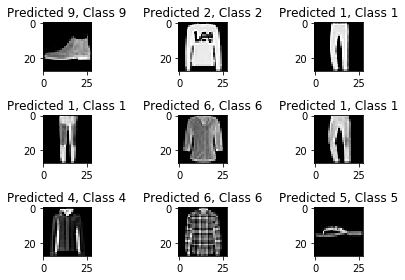

In [40]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found {} correct labels".format(len(correct)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

# Plot incorrect labels

Found 1150 incorrect labels


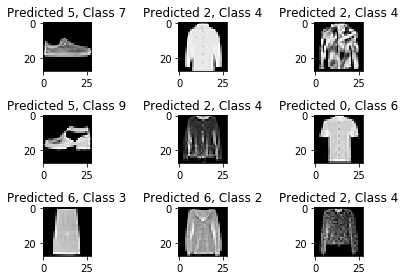

In [41]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found {} incorrect labels".format(len(incorrect)))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

# Confusion matrix

In [101]:
import seaborn as sns
confusion_mtx = confusion_matrix(y_test, predicted_classes) 
confusion_mtx

array([[833,   1,  10,  19,   2,   0, 122,   1,  11,   1],
       [ 10, 959,   1,  20,   8,   0,   1,   0,   1,   0],
       [ 65,   0, 807,  11,  69,   0,  42,   0,   6,   0],
       [ 54,   5,   7, 883,  26,   0,  18,   0,   7,   0],
       [ 42,   0, 100,  26, 769,   0,  50,   0,  13,   0],
       [  0,   0,   0,   0,   0, 939,   0,  42,   0,  19],
       [157,   0,  71,  21,  55,   0, 684,   0,  12,   0],
       [  0,   0,   0,   0,   0,   4,   0, 978,   0,  18],
       [ 11,   0,   3,   2,   0,   1,   2,  15, 964,   2],
       [  0,   0,   0,   0,   0,   8,   1,  48,   0, 943]], dtype=int64)

# Part 2

In [284]:
import tensorflow as tf
import keras
import keras.backend as K
def qmi(y_true, y_pred):

	s = 0.1

	M1 = tf.shape(y_pred)[0]

	m1 = tf.cast(M1, 'float32')

	y_true = tf.cast(y_true, 'float32')

	pi = tf.cast(np.pi, 'float32')

	a1 = K.repeat(tf.transpose(y_pred), M1)


	b1 = tf.transpose(a1, perm=[0,2,1])


	a2 = K.repeat(tf.transpose(y_true), M1)


	b2 = tf.transpose(a2, perm=[0,2,1])
	v1_ij = K.exp(-K.sum(K.square(b1 - a1),axis=0) / 2*s**2) / (K.sqrt(2*pi)*s)
	v2_ij = K.exp(-K.sum(K.square(b2 - a2),axis=0) / 2*s**2) / (K.sqrt(2*pi)*s)

	v1_i=K.mean(v1_ij,axis=1)
	v2_i=K.mean(v2_ij,axis=1)

	v1=K.mean(v1_i)
	v2=K.mean(v2_i)

	vj=K.sum(v1_ij*v2_ij)/(m1**2)
	vm=v1*v2
	vc=K.mean(v1_i*v2_i)

	cost=vj+vm-(2*vc)

	return -cost

# Passing the encoder output through the MLP classifier 

In [285]:
train_y_one_hot = tf.keras.utils.to_categorical(y_train)
test_y_one_hot = tf.keras.utils.to_categorical(y_test)

In [286]:
x_test.shape

(10000, 784)

In [287]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,SGD
def create_model(bottleneck,input_dim=28*28,M=None):
    model=Sequential()
    model.add(Dense(500,activation='relu',input_shape=(input_dim,)))
    #model.add(Dropout(0.4))
    model.add(Dense(200,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(bottleneck,activation=M))
    #model.add(Dense(n_out,activation='sigmoid'))
    optimizer=Adam(learning_rate=-0.001)
    model.compile(optimizer=optimizer,loss=qmi)
    #model.fit(x_train,train_y_one_hot,epochs=25,batch_size=200,verbose=1,validation_data=(x_test,test_y_one_hot))
    return model

In [291]:
H=create_model(20,input_dim=28*28)
K=H.fit(x_train,train_y_one_hot,epochs=25,batch_size=200,verbose=1,validation_data=(x_test,test_y_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 76us/step - loss: -9.6703e-06 - val_loss: -1.1597e-05
Epoch 2/25
60000/60000 [==============================] - 4s 69us/step - loss: 4.4187e-06 - val_loss: 5.0354e-06
Epoch 3/25
60000/60000 [==============================] - 4s 70us/step - loss: 2.6004e-06 - val_loss: 4.0436e-06
Epoch 4/25
60000/60000 [==============================] - 4s 70us/step - loss: 6.1480e-06 - val_loss: 5.9891e-06
Epoch 5/25
60000/60000 [==============================] - 4s 72us/step - loss: 2.1553e-06 - val_loss: -9.9182e-07
Epoch 6/25
60000/60000 [==============================] - 4s 72us/step - loss: -3.8783e-06 - val_loss: -5.2643e-06
Epoch 7/25
60000/60000 [==============================] - 4s 73us/step - loss: -7.9600e-06 - val_loss: -9.2697e-06
Epoch 8/25
60000/60000 [==============================] - 4s 73us/step - loss: -1.0223e-05 - val_loss: -1.0529e-05
Epoch 9/25
60000/60000 [=============

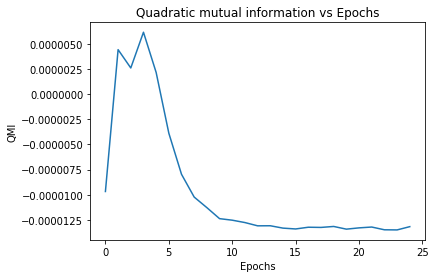

In [293]:
loss=np.asarray(K.history['loss'])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss)
plt.title('Quadratic mutual information vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('QMI');

In [294]:
train_labels = np.argmax(train_y_one_hot, axis = 1) 
labels_all = [0,1,2,3,4,5,6,7,8,9]

X_train_individual_classes = []
for i in labels_all:
  idx = np.where(train_labels == i)
  X_train_temp = x_train[idx,:]
  X_train_temp = X_train_temp.reshape(X_train_temp.shape[1],X_train_temp.shape[2])
  print(X_train_temp.shape)
  X_train_individual_classes.append(X_train_temp)
X_train_individual_classes = np.array(X_train_individual_classes)
print(X_train_individual_classes.shape)

(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(10, 6000, 784)


In [295]:
mean = []
covar =[]
p_c = []
for i in labels_all:
  prediction_temp = H.predict(X_train_individual_classes[i])

  mean_temp = np.mean(prediction_temp, axis = 0)
  mean.append(mean_temp)
  print("Mean:")
  print(mean_temp.shape)
  print(mean_temp)

  print("Covar:")
  covar_temp = np.cov(prediction_temp, rowvar=False)
  covar.append(covar_temp)
  print(covar_temp.shape)
  print(covar_temp)

  print("Class probability P(C):")
  p_c_temp = X_train_individual_classes[i].shape[0]/x_train.shape[0]
  p_c.append(p_c_temp)
  print(p_c_temp)
  print("*******************************************************************")

mean = np.array(mean)
covar = np.array(covar)
p_c = np.array(p_c)



Mean:
(20,)
[ 9.99271106e-06 -2.69259363e-06  2.60623365e-05 -6.61962122e-06
 -3.60674971e-06  1.38541309e-05 -1.34064667e-05  2.24173946e-05
  2.35384214e-05 -1.46780349e-05  1.09473103e-05  6.80201174e-06
 -1.20491795e-05  1.88261783e-05  1.44008482e-05  4.30704495e-06
  2.72532707e-05 -1.53434630e-05  5.07090635e-06 -3.69401710e-06]
Covar:
(20, 20)
[[ 7.29640787e-07  1.65040541e-08  2.94954718e-07  1.87012122e-07
  -2.60989489e-07 -3.89313437e-08  6.20350221e-08  5.98634498e-08
   1.09675205e-07 -2.36499155e-07  3.25169217e-08  2.15629892e-07
  -1.71269067e-07  2.90385832e-08  1.92343573e-07 -8.80513148e-08
   2.89154229e-07 -2.13090654e-09  9.64742581e-08  4.02348409e-08]
 [ 1.65040541e-08  5.11862873e-07 -2.29090347e-07  1.48282504e-07
   2.38652791e-07  4.53794351e-08  1.41401273e-07  1.35988753e-07
   6.98556482e-09 -5.26838724e-08  8.86695953e-11  6.37644043e-08
   4.76892098e-08  7.49344483e-09  2.14450176e-08 -3.10198674e-08
  -2.54721318e-07 -3.61548640e-08 -3.29821790e-07 -

(20, 20)
[[ 2.09625758e-07  5.04172508e-08 -4.64479326e-08 -3.33754875e-08
   5.87079835e-08  4.02857023e-09  3.61072055e-08  6.26576866e-09
  -4.01064930e-08 -7.67369869e-09  5.13211448e-09  9.56032993e-11
  -1.06732259e-07  4.62107748e-08 -6.85964486e-08 -9.79089543e-08
  -5.93302899e-08 -1.32133398e-08 -3.43148668e-08 -1.53918957e-08]
 [ 5.04172508e-08  2.11040786e-07  1.22809426e-08 -2.05459982e-09
   2.77971868e-08 -6.30595575e-08  4.97384339e-08 -7.25024450e-08
  -9.60924620e-09  3.37371803e-08 -2.32769344e-08  1.25714397e-10
  -4.61241133e-08  2.58099754e-08  1.67512346e-08 -3.72971955e-08
   2.20571093e-08  2.37982657e-08  6.24753175e-08  6.33246095e-09]
 [-4.64479326e-08  1.22809426e-08  1.97603127e-07 -1.05580283e-08
  -4.48050572e-08 -1.12912123e-07  6.95956397e-08  1.68356769e-08
   6.06989873e-08 -4.86850531e-08  7.13176874e-08  9.29204300e-10
   1.42005411e-07 -7.87319558e-08  9.12782807e-08  8.36953574e-09
   6.73074112e-08 -1.92343359e-08  7.34344234e-08  4.50871964e-08

(20, 20)
[[ 2.82702119e-07  1.46110235e-07  4.10425566e-08 -2.91806829e-07
   1.37085533e-07 -1.18936448e-08  7.37713638e-08  1.08479478e-07
   3.05306587e-07  8.45199592e-08  1.46782131e-07  7.89388120e-08
   1.12745939e-07 -1.78572664e-07  2.83322672e-08 -1.58428074e-07
   1.59016870e-07  2.79571988e-07  7.45897662e-08  1.06474159e-07]
 [ 1.46110235e-07  1.29460620e-07  1.59106297e-08 -1.89046514e-07
   1.03895175e-07  1.40317064e-08  4.50489134e-08  9.74655469e-08
   2.04829007e-07  6.43157587e-08  9.98642593e-08  6.54099155e-08
   5.64343666e-08 -1.09833990e-07  1.69037836e-08 -1.13034908e-07
   1.08188978e-07  1.73957169e-07  5.05627353e-08  5.28351653e-08]
 [ 4.10425566e-08  1.59106297e-08  1.40670575e-07 -8.74986867e-08
   3.48073458e-09  5.65096300e-08  6.30991846e-10 -9.45386215e-08
  -5.88550667e-09 -5.00985994e-08  6.35259321e-08 -6.63342245e-09
   4.17803999e-08  2.27177618e-08  6.16206131e-08  2.91481852e-08
   2.71099242e-08  3.51338515e-08  6.97962388e-08  7.86655357e-08

Mean:
(20,)
[ 1.3401143e-05  5.0899889e-06 -7.4417821e-06  6.0268394e-06
  2.7793239e-06  4.9348864e-07  2.5960073e-06  7.8906314e-06
  6.9395223e-06  8.6958189e-06  1.2160290e-05 -1.5016323e-05
  6.4278896e-07 -5.0640729e-06 -7.5655935e-06 -9.6848962e-06
 -2.1994065e-06 -9.8115670e-06 -4.5248203e-06 -5.9155905e-06]
Covar:
(20, 20)
[[ 1.45262382e-07  1.03949310e-09 -9.88088696e-09  3.22732735e-08
   6.16117564e-08 -3.49585697e-08 -1.79621256e-08  4.18065260e-08
  -5.23171766e-09 -7.94351501e-09 -4.53391619e-08 -1.88464371e-08
   1.29200972e-08 -3.94180944e-08 -4.73060852e-08 -3.48293284e-08
  -3.78322638e-08  6.19442833e-09 -3.50908128e-08 -1.65896389e-09]
 [ 1.03949310e-09  7.29060653e-08 -5.27551945e-08  1.61474573e-08
  -6.74351632e-09  5.15604991e-08  7.70992463e-09 -1.14029914e-08
  -9.19213937e-09  5.70571592e-08  1.81537846e-08 -8.17481217e-09
   1.09615947e-08  4.18699455e-08 -7.61566609e-09 -3.17803019e-08
  -2.47575360e-08  1.87810396e-09 -2.04042327e-08  3.11079924e-08]
 [-9

(20, 20)
[[ 7.01245979e-07 -2.61267574e-08  1.08233709e-07 -1.58490785e-08
   1.23703890e-07  7.94292224e-08 -1.74485712e-07  1.89359038e-07
  -1.64163647e-07  1.56415729e-07 -1.00489246e-07 -7.58961691e-08
   7.64744788e-08 -1.52330884e-07 -1.55148479e-07  3.98500055e-08
  -6.67322079e-09  2.90262996e-07 -1.90555936e-07 -1.16018324e-07]
 [-2.61267574e-08  5.84774983e-07  1.99898218e-07 -8.72163972e-08
  -1.50195851e-07 -3.50307798e-08  1.28364632e-07 -2.01201832e-07
  -2.82329277e-08 -4.42056644e-08  1.63773039e-07 -1.24181397e-07
  -3.41780235e-08  5.27370952e-08  1.58166734e-08  1.40736020e-08
   6.42338607e-08  7.32539359e-08  2.79066081e-08 -4.19813384e-08]
 [ 1.08233709e-07  1.99898218e-07  6.42850128e-07 -7.95690780e-08
  -3.08583630e-07 -1.42924035e-07  1.71772094e-07 -1.97904545e-07
  -1.85040541e-08 -3.65888946e-08  1.76288529e-07  1.13058632e-07
   9.58163605e-08 -1.04618432e-07  1.20478810e-07 -5.70658756e-08
   9.93198980e-08 -8.67752822e-08  9.54660071e-08 -1.67698259e-07

In [310]:
import math
import cmath
labels_all = [0,1,2,3,4,5,6,7,8,9]
count = 0


X_test_sub = x_test
print(len(X_test_sub))

predicted_labels = []
true_labels = []

# final_set = 
for idx, sample in enumerate(X_test_sub):
  # print(idx)
  # print(sample.shape)
  sample = sample.reshape(1,sample.shape[0])
  prediction = H.predict(sample)
  prediction = prediction[0]
  # print(prediction)
  probabilites = []
  for label in labels_all:
    x_minus_mean = prediction - mean[label]
    # print(x_minus_mean.shape)
    # print(covar[label])
    try:
      covar_inv = np.linalg.inv(covar[label])
      
    except:
      print("Inverse failed")
      covar_inv = covar[label] + 0.00001*np.identity(covar[label].shape[0])
      print("New covar:",covar_inv)
      covar_inv = np.linalg.inv(covar[label])
    
    prod_1 = np.matmul(np.transpose(x_minus_mean),covar_inv)
    
    prod_2 = np.matmul(prod_1,x_minus_mean)
    
    exp_val = np.exp((-0.5)*prod_2)
    
    determinant_val = cmath.sqrt(np.linalg.det(covar[label]))
    
    P_x_by_c = (exp_val/determinant_val)
    probabilites.append(P_x_by_c * p_c[label])
  
  final_class = np.argmax(probabilites)

  true_label = np.argmax(test_y_one_hot[idx])
  


  predicted_labels.append(final_class)
  true_labels.append(true_label)
  if final_class == true_label:
    count += 1
  
  # break
print((count/len(X_test_sub))*100,"% accuracy")
test_accuracy = (count/len(X_test_sub))*100


10000


C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp
C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in cdouble_scalars
C:\Users\ritvikpalvankar7\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in true_divide


10.17 % accuracy


            T-shirt  Trouser  Pullover  Dress  Coat  Sandal  Shirt  Sneaker  \
T-shirt           0        0         0      0     0       0      0        0   
Trouser           0        0         0      0     0       1      0        0   
Pullover          0        0         0      0     0       0      0        0   
Dress             0        0         0      0     0       1      0        0   
Coat              0        0         0      0     0       0      1        0   
Sandal            0        1         0      0     1      16      2        3   
Shirt             0        0         0      0     0       1      2        0   
Sneaker           0        0         0      0     0       1      0        0   
Bag               0        0         0      0     0       1      0        1   
Ankle boot     1000      999      1000   1000   999     979    995      996   

            Bag  Ankle boot  
T-shirt       0           0  
Trouser       0           0  
Pullover      0           0  
Dress     

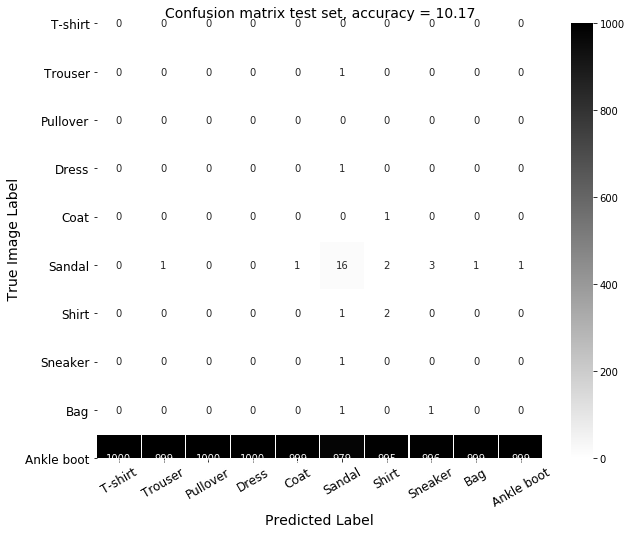

In [313]:
prediction_dataset = predicted_labels
correct_label = true_labels
length_loader = len(x_test)

import pandas as pd

c_matrix = (confusion_matrix(correct_label, prediction_dataset,labels= [0,1,2,3,4,5,6,7,8,9]))

classes = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# classes = ["T-shirt", "Trouser"]
CM_title = "Confusion matrix test set, accuracy = " + str(test_accuracy)
ConfMat = np.transpose(c_matrix)

df_cm = pd.DataFrame(ConfMat)
df_cm.columns = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
df_cm.rename(index={0:"T-shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}, inplace=True)
# df_cm.columns = ["T-shirt", "Trouser"]
# df_cm.rename(index={0:"T-shirt", 1:"Trouser"}, inplace=True)
print(df_cm)


plt.figure(figsize = (10,8))

font = {'size': 14}
font_axis = {'size': 12}
ax = sns.heatmap(df_cm, annot=True, fmt = "d", linewidths=.2, cmap = "gray_r")
ax.set_xticklabels(classes,rotation=30,fontdict=font_axis)
ax.set_yticklabels(classes,rotation=0,fontdict=font_axis)
ax.set_title (CM_title,fontsize=14)
ax.set_ylabel(' True Image Label', fontdict=font)
ax.set_xlabel('Predicted Label', fontdict=font)
plt.show()
